### Dependencies

In [5]:
#!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
import sys
import warnings

# Regex
import re

# NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# TextBlob
from textblob import TextBlob

#import tensorflow as tf
#from tensorflow.keras import datasets, preprocessing, models, layers,regularizers
#print(tf.__version__)

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [7]:
# Import

In [8]:
music_df = pd.read_csv("../etl/data/lyrics_etl.csv")
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1zZEly0sLmyDm75c1pAqYf,Lightskin Lil Wayne,2022-02-24T01:46:41.849Z,Intro: Lil Wayne\nFuck you gon' stand next to ...
1,1,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,2022-02-24T01:44:07.533Z,Recording Info\n\nVerse 1: Coolio\nAs I walk t...
2,2,4GhHrgsaiQsuMQCHTGa87C,Badlands,2022-02-24T01:29:39.950Z,Verse 1\nI can never tell what you want from m...
3,3,4efLhkYJJf2R6WhbwpFi85,Black Panther (feat. Rafal),2022-02-24T01:28:15.792Z,"1 куплет:\nТвое тело просто секс, секс, секс, ..."
4,4,4wEbikMfcSFAukCbbL06si,No Vaseline,2022-02-24T01:24:32.475Z,Produced by Sir Jinx\n\nIntro\nDamn\nForgot to...


### Regex Cleaning

In [9]:
def html_cleaner (string):
    html_cleaner = re.sub(r'\n', " ", string)
    return html_cleaner

In [10]:
music_df['lyrics'] = music_df.lyrics.apply(html_cleaner)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1zZEly0sLmyDm75c1pAqYf,Lightskin Lil Wayne,2022-02-24T01:46:41.849Z,Intro: Lil Wayne Fuck you gon' stand next to a...
1,1,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,2022-02-24T01:44:07.533Z,Recording Info Verse 1: Coolio As I walk thro...
2,2,4GhHrgsaiQsuMQCHTGa87C,Badlands,2022-02-24T01:29:39.950Z,Verse 1 I can never tell what you want from me...
3,3,4efLhkYJJf2R6WhbwpFi85,Black Panther (feat. Rafal),2022-02-24T01:28:15.792Z,"1 куплет: Твое тело просто секс, секс, секс, с..."
4,4,4wEbikMfcSFAukCbbL06si,No Vaseline,2022-02-24T01:24:32.475Z,Produced by Sir Jinx Intro Damn Forgot to do ...


### Tokenization

In [11]:
# Donwload tokenizer from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/pierre-
[nltk_data]     macmini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def tokenizer (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [13]:
music_df['lyrics'] = music_df['lyrics'].apply(tokenizer)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1zZEly0sLmyDm75c1pAqYf,Lightskin Lil Wayne,2022-02-24T01:46:41.849Z,"[Intro, Lil, Wayne, Fuck, you, gon, stand, nex..."
1,1,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,2022-02-24T01:44:07.533Z,"[Recording, Info, Verse, 1, Coolio, As, I, wal..."
2,2,4GhHrgsaiQsuMQCHTGa87C,Badlands,2022-02-24T01:29:39.950Z,"[Verse, 1, I, can, never, tell, what, you, wan..."
3,3,4efLhkYJJf2R6WhbwpFi85,Black Panther (feat. Rafal),2022-02-24T01:28:15.792Z,"[1, куплет, Твое, тело, просто, секс, секс, се..."
4,4,4wEbikMfcSFAukCbbL06si,No Vaseline,2022-02-24T01:24:32.475Z,"[Produced, by, Sir, Jinx, Intro, Damn, Forgot,..."


In [14]:
# Remove comma
music_df['lyrics'] = music_df['lyrics'].apply(lambda x: " ".join(x))
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1zZEly0sLmyDm75c1pAqYf,Lightskin Lil Wayne,2022-02-24T01:46:41.849Z,Intro Lil Wayne Fuck you gon stand next to a n...
1,1,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,2022-02-24T01:44:07.533Z,Recording Info Verse 1 Coolio As I walk throug...
2,2,4GhHrgsaiQsuMQCHTGa87C,Badlands,2022-02-24T01:29:39.950Z,Verse 1 I can never tell what you want from me...
3,3,4efLhkYJJf2R6WhbwpFi85,Black Panther (feat. Rafal),2022-02-24T01:28:15.792Z,1 куплет Твое тело просто секс секс секс секс ...
4,4,4wEbikMfcSFAukCbbL06si,No Vaseline,2022-02-24T01:24:32.475Z,Produced by Sir Jinx Intro Damn Forgot to do s...


### Stop Words

In [15]:
nltk.download('stopwords') #stopwords

[nltk_data] Downloading package stopwords to /Users/pierre-
[nltk_data]     macmini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'yourselves', 'won', 'll', 'again', "mustn't", 'the', 'this', 'hasn', 'ours', 'had', 'while', 'ma', 'was', 'both', "it's", 'which', 'above', 'their', 'own', 'theirs', 'i', "she's", 'so', 'having', 'o', 'or', 'once', 'such', 'into', 'didn', "didn't", 'needn', 'what', "mightn't", "shouldn't", 'ourselves', "shan't", 'you', 'your', 'how', 'did', 'most', 'y', "wouldn't", 'these', 'for', 'mustn', 'no', 'am', 'mightn', 'shan', 'haven', 'now', 'because', "that'll", 'a', 'off', "needn't", 'does', 't', 'are', 'some', 'shouldn', 'have', 's', 'been', 'we', "you'd", 'at', 'through', 'yourself', 'were', 'wouldn', 'between', 'and', 'aren', 'hers', 'too', 'until', 'them', 'further', 'an', 'he', 'than', "haven't", "weren't", 'if', 'she', 'don', 'doesn', 'then', 'more', 'those', 'has', 'all', "you've", 'our', "you'll", 'from', 'itself', "hadn't", 'over', 'but', 'wasn', 'whom', 'nor', 'here', 'themselves', 'they', 'when', 'myself', 'in', "won't", 'do', 'after', 'me', 'herself', 'who', "aren't", 'couldn'

In [17]:
music_df.lyrics = music_df.lyrics.apply(lambda x: x.split(" "))

In [18]:
def stop_words (data):
    stop_words = set(stopwords.words('english'))
    stop_words_list = []
    for string in data:
        if string not in stop_words:
            stop_words_list.append(string)
    return " ".join(stop_words_list)

In [19]:
music_df.lyrics = music_df.lyrics.apply(stop_words)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,1zZEly0sLmyDm75c1pAqYf,Lightskin Lil Wayne,2022-02-24T01:46:41.849Z,Intro Lil Wayne Fuck gon stand next nigga like...
1,1,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,2022-02-24T01:44:07.533Z,Recording Info Verse 1 Coolio As I walk valley...
2,2,4GhHrgsaiQsuMQCHTGa87C,Badlands,2022-02-24T01:29:39.950Z,Verse 1 I never tell want Seems like always go...
3,3,4efLhkYJJf2R6WhbwpFi85,Black Panther (feat. Rafal),2022-02-24T01:28:15.792Z,1 куплет Твое тело просто секс секс секс секс ...
4,4,4wEbikMfcSFAukCbbL06si,No Vaseline,2022-02-24T01:24:32.475Z,Produced Sir Jinx Intro Damn Forgot somethin l...


### Sentiment Analysis

In [20]:
my_test = "I love my wife"
blob = TextBlob(my_test)
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /Users/pierre-
[nltk_data]     macmini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
intAnalyser = SentimentIntensityAnalyzer()
polarity = intAnalyser.polarity_scores(my_test)
polarity

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [23]:
def sentimentScore(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [24]:
music_df['sentiment_compound'] = music_df.lyrics.apply(sentimentScore)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics,sentiment_compound
0,0,1zZEly0sLmyDm75c1pAqYf,Lightskin Lil Wayne,2022-02-24T01:46:41.849Z,Intro Lil Wayne Fuck gon stand next nigga like...,-0.9919
1,1,1DIXPcTDzTj8ZMHt3PDt8p,Gangsta's Paradise,2022-02-24T01:44:07.533Z,Recording Info Verse 1 Coolio As I walk valley...,0.9886
2,2,4GhHrgsaiQsuMQCHTGa87C,Badlands,2022-02-24T01:29:39.950Z,Verse 1 I never tell want Seems like always go...,0.8548
3,3,4efLhkYJJf2R6WhbwpFi85,Black Panther (feat. Rafal),2022-02-24T01:28:15.792Z,1 куплет Твое тело просто секс секс секс секс ...,0.5267
4,4,4wEbikMfcSFAukCbbL06si,No Vaseline,2022-02-24T01:24:32.475Z,Produced Sir Jinx Intro Damn Forgot somethin l...,-0.9996


### Visualization

In [25]:
music_df.song_name.value_counts()

Gangsta's Paradise             1
Black Panther (feat. Rafal)    1
Badlands                       1
Lightskin Lil Wayne            1
No Vaseline                    1
Name: song_name, dtype: int64

In [26]:
music_sent = music_df.groupby(['song_name'])['sentiment_compound'].mean().sort_values()
music_sent

song_name
No Vaseline                   -0.9996
Lightskin Lil Wayne           -0.9919
Black Panther (feat. Rafal)    0.5267
Badlands                       0.8548
Gangsta's Paradise             0.9886
Name: sentiment_compound, dtype: float64

<AxesSubplot:xlabel='song_name'>

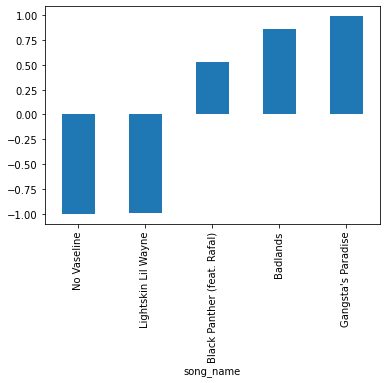

In [27]:
music_sent.plot(kind="bar")